In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # we will use this library for --> (mode, skew, kurtosis, iqr) 

In [2]:
df_2021 = pd.read_csv('world-happiness-report-2021.csv')

In [3]:
df_2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [4]:
df1_2021= df_2021[['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].copy() 

In [30]:
df1_2021.head(10)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338
5,Norway,Western Europe,7.392,11.053,0.954,73.3,0.960,0.093,0.270
6,Sweden,Western Europe,7.363,10.867,0.934,72.7,0.945,0.086,0.237
7,Luxembourg,Western Europe,7.324,11.647,0.908,72.6,0.907,-0.034,0.386
8,New Zealand,North America and ANZ,7.277,10.643,0.948,73.4,0.929,0.134,0.242
9,Austria,Western Europe,7.268,10.906,0.934,73.3,0.908,0.042,0.481


In [6]:
df1_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Regional indicator            149 non-null    object 
 2   Ladder score                  149 non-null    float64
 3   Logged GDP per capita         149 non-null    float64
 4   Social support                149 non-null    float64
 5   Healthy life expectancy       149 non-null    float64
 6   Freedom to make life choices  149 non-null    float64
 7   Generosity                    149 non-null    float64
 8   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


In [7]:
df1_2021["Logged GDP per capita"].describe()
#mean=9.43    median=9.56     left skewed but very minimum
#max-75= 1.2  25-min=1.9  q1 8.5  q3 10.40  q2 9.56  mean solda
#ıqr=q3-q1
#min=q1-1.5ıqr=5.72
# max=q3+1.3 ıqr=13.24

count    149.000000
mean       9.432208
std        1.158601
min        6.635000
25%        8.541000
50%        9.569000
75%       10.421000
max       11.647000
Name: Logged GDP per capita, dtype: float64

### Basic Score Explanations of the Variables:
- **Ladder score**: Happiness score. 0 lowest, 10 maximum

- **Social Support**: Perceived social support score 0 lowest, 10 maximum

- **Freedom to make life choices**: Perceived freedom of expression 0 lowest, 10 maximum
- **Perceptions of corruption**: Perceived corruption and kind of distrust in institutions  0 lowest, 10 maximum distrust

In [8]:
df1_2021.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


#### For the sake of the learning the concepts in depht we will first focus on only 'Ladder score' variable

In [9]:
df1_2021['Ladder score'].describe()

count    149.000000
mean       5.532839
std        1.073924
min        2.523000
25%        4.852000
50%        5.534000
75%        6.255000
max        7.842000
Name: Ladder score, dtype: float64

### Mean & Median

#### **Rule of thumb**:

- If mean is bigger than median, skewed RIGHT (positive).
- If mean is equal to median, symmetric.
- If median is bigger than mean, skewed LEFT (negative).

Reference : Course materials

### Skewness

#### **Rule of thumb**:

- If skewness is less than −1 or greater than +1, the distribution is highly skewed.
- If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
- If skewness is between −½ and +½, the distribution is approximately symmetric.

Reference: https://brownmath.com/stat/shape.htm

In [10]:
stats.skew(df1_2021['Logged GDP per capita'])  # appoximately symmetric derim.

-0.34847127811927237

In [11]:
stats.skew(df1_2021['Ladder score'])

-0.10321590748801875

In [12]:
# Since result for 'Ladder Score is -0.10' we can safely assume that for our sample, ladder scores are approximately symmetric

### Shape - Kurtosis

Image of Kurtosis

In [13]:
stats.kurtosis(df1_2021['Ladder score'])

-0.396251438604001

#### **Rule of thumb**:

- If kurtosis is bigger than 0, compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.
- In normal distribution, kurtosis is = 0 
- If kurtosis is less than 0, Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.

3 değer var  python da= 0 dan büyük 0 a eşit 0 dan büyük

Reference: https://brownmath.com/stat/shape.htm

In [14]:
# Since result for 'Ladder Score is ''-0.396' we can assume that central peak is lower than normal and broader, but not a bigger extent.

In [15]:
stats.kurtosis(df1_2021["Logged GDP per capita"])  # 0 a yakın sola çeken

-0.8283005045350476

### **Ladder Score**

### Histogram

<Figure size 2800x2400 with 0 Axes>

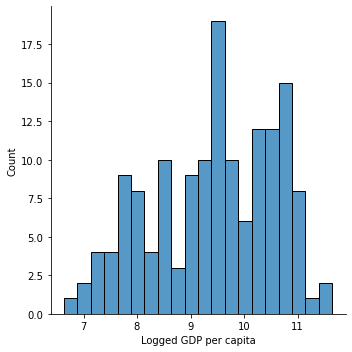

In [16]:
plt.figure(figsize=(14,12),dpi=200)
sns.displot(x='Logged GDP per capita', data=df1_2021, bins=20);

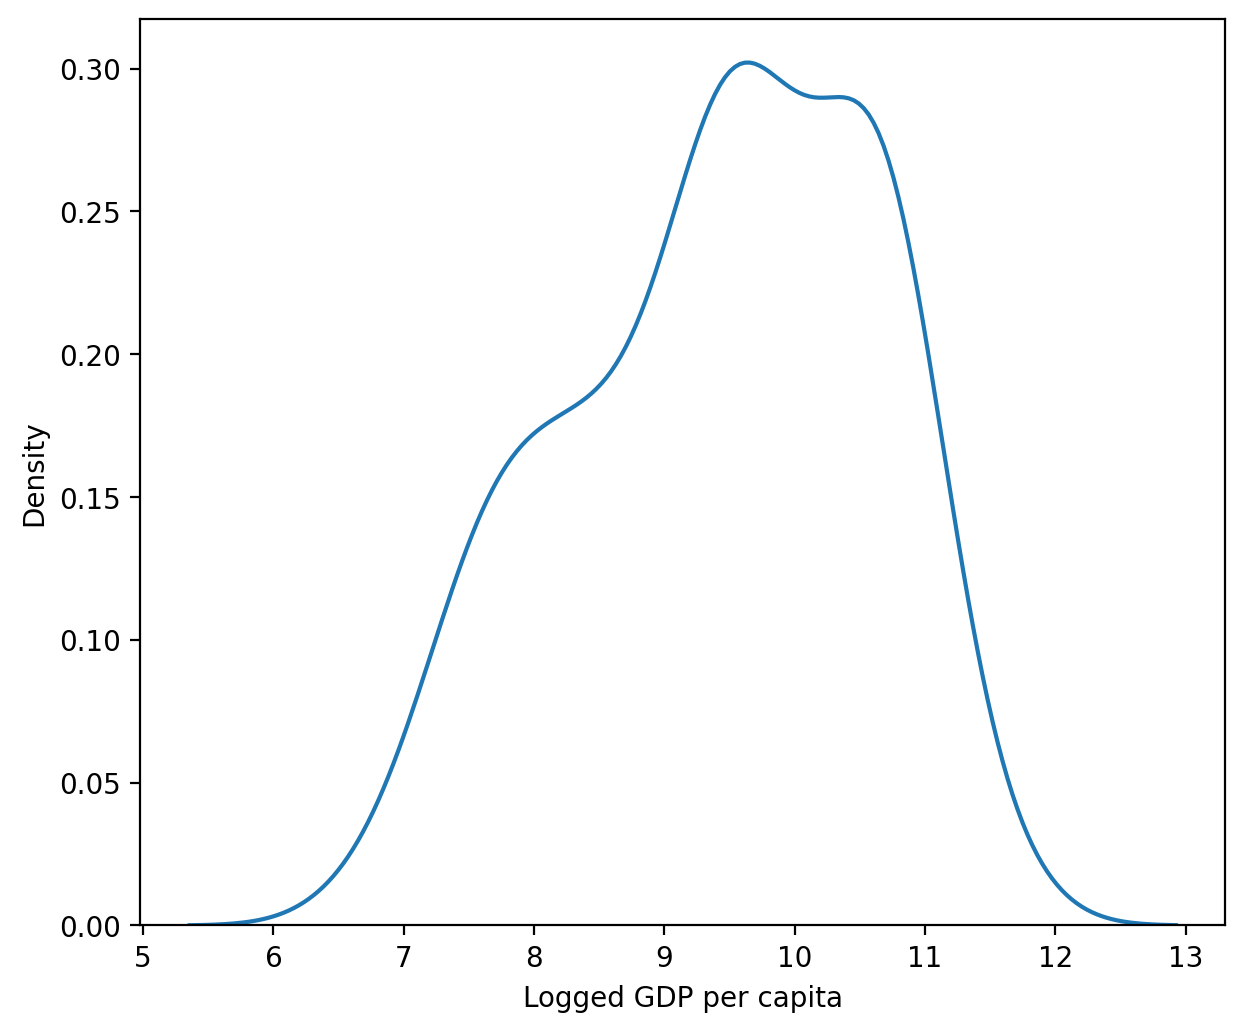

In [17]:
plt.figure(figsize=(7,6),dpi=200)
sns.kdeplot(x='Logged GDP per capita', data=df1_2021);

#### **KDE**

<Figure size 2800x2400 with 0 Axes>

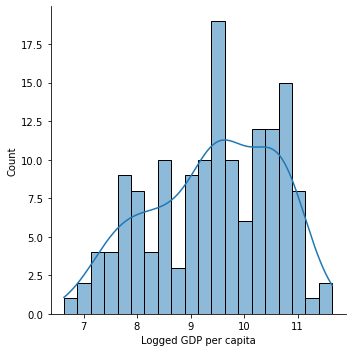

In [18]:
plt.figure(figsize=(14,12),dpi=200)
sns.displot(x='Logged GDP per capita', data=df1_2021, bins=20, kde=True);

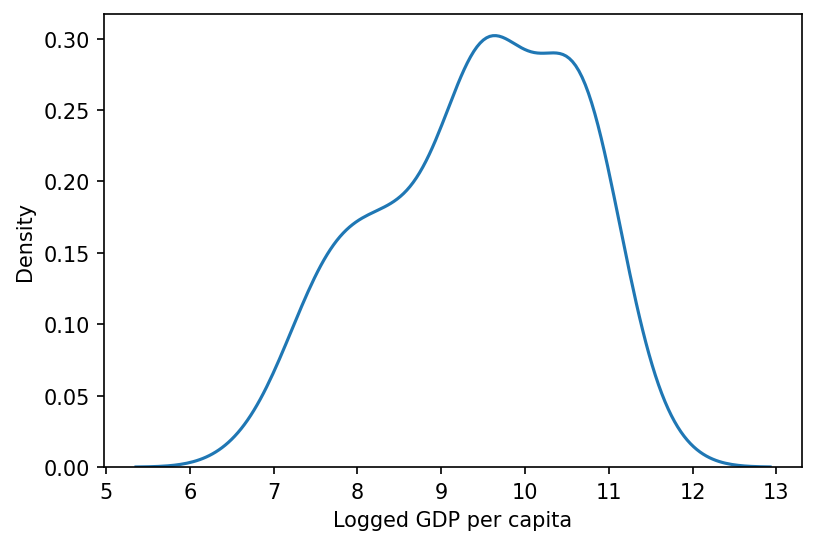

In [19]:
plt.figure(figsize=(6,4),dpi=150)
sns.kdeplot(x='Logged GDP per capita', data=df1_2021);

### Note:
Histograms gives us to visualize numerical variables. But keep in mind that:
- Histograms do not identify outliers statistically like boxplot.
- Visual representation's intrepretation depends solely on data analyst's view.

#### Dispersion (Measure of Spread) --> The Interquartile Range (IQR)

IQR image

#### **Boxplot**

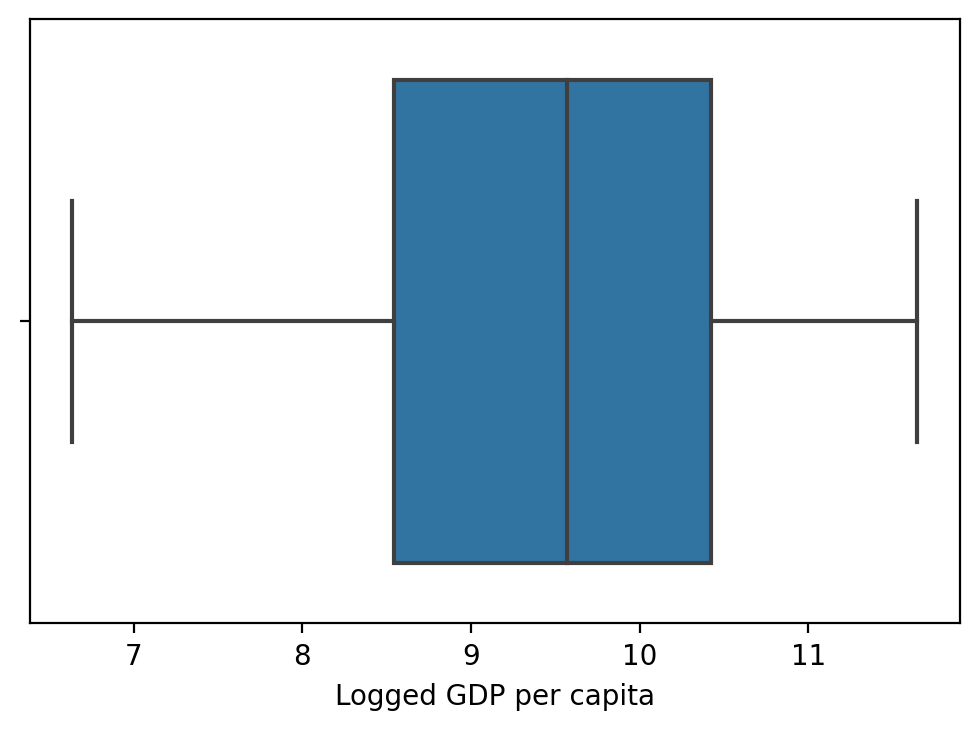

In [20]:
plt.figure(figsize=(6,4),dpi=200)
sns.boxplot(x='Logged GDP per capita', data=df1_2021, orient='h');

In [21]:
df1_2021['Logged GDP per capita'].describe()

count    149.000000
mean       9.432208
std        1.158601
min        6.635000
25%        8.541000
50%        9.569000
75%       10.421000
max       11.647000
Name: Logged GDP per capita, dtype: float64

In [22]:
Q1,Q3= np.percentile(df1_2021['Logged GDP per capita'],[25,75])
Q1, Q3

(8.541, 10.421)

In [23]:
IQR = Q3-Q1
IQR

1.879999999999999

In [24]:
stats.iqr(df1_2021['Logged GDP per capita'])

1.879999999999999

In [25]:
minimum = Q1-1.5*IQR
minimum

5.721000000000002

In [26]:
maximum = Q3+1.5*IQR
maximum

13.240999999999998

In [27]:
potential_outliers = df1_2021[(df1_2021['Logged GDP per capita']<minimum) |(df1_2021['Logged GDP per capita'] > maximum)]
potential_outliers

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


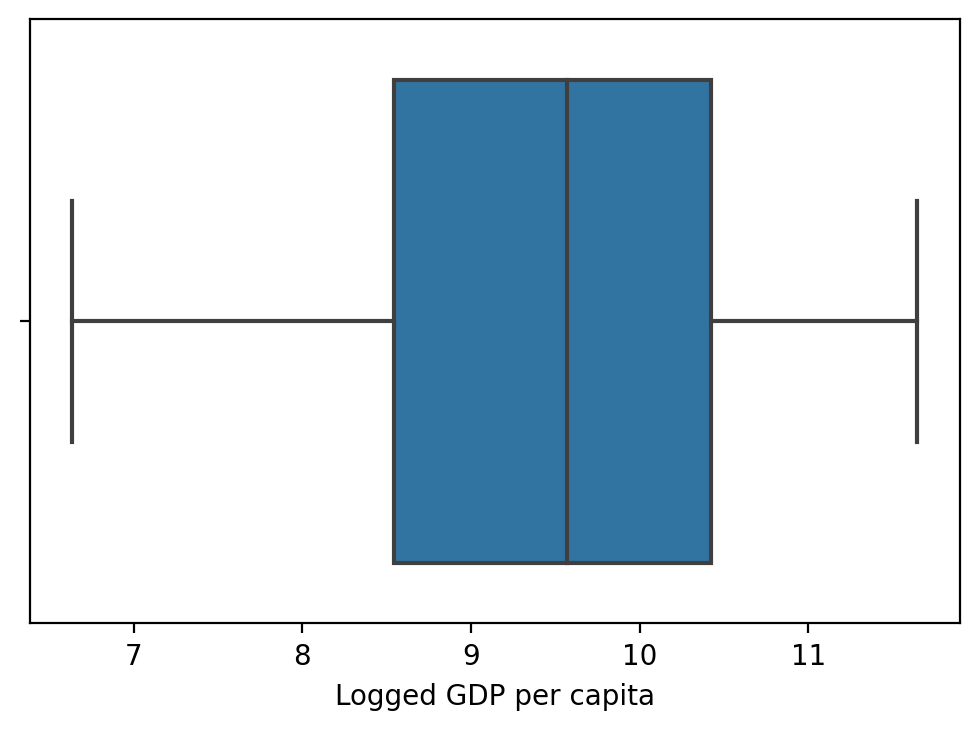

In [28]:
plt.figure(figsize=(6,4),dpi=200)
sns.boxplot(x='Logged GDP per capita', data=df1_2021, orient='h');

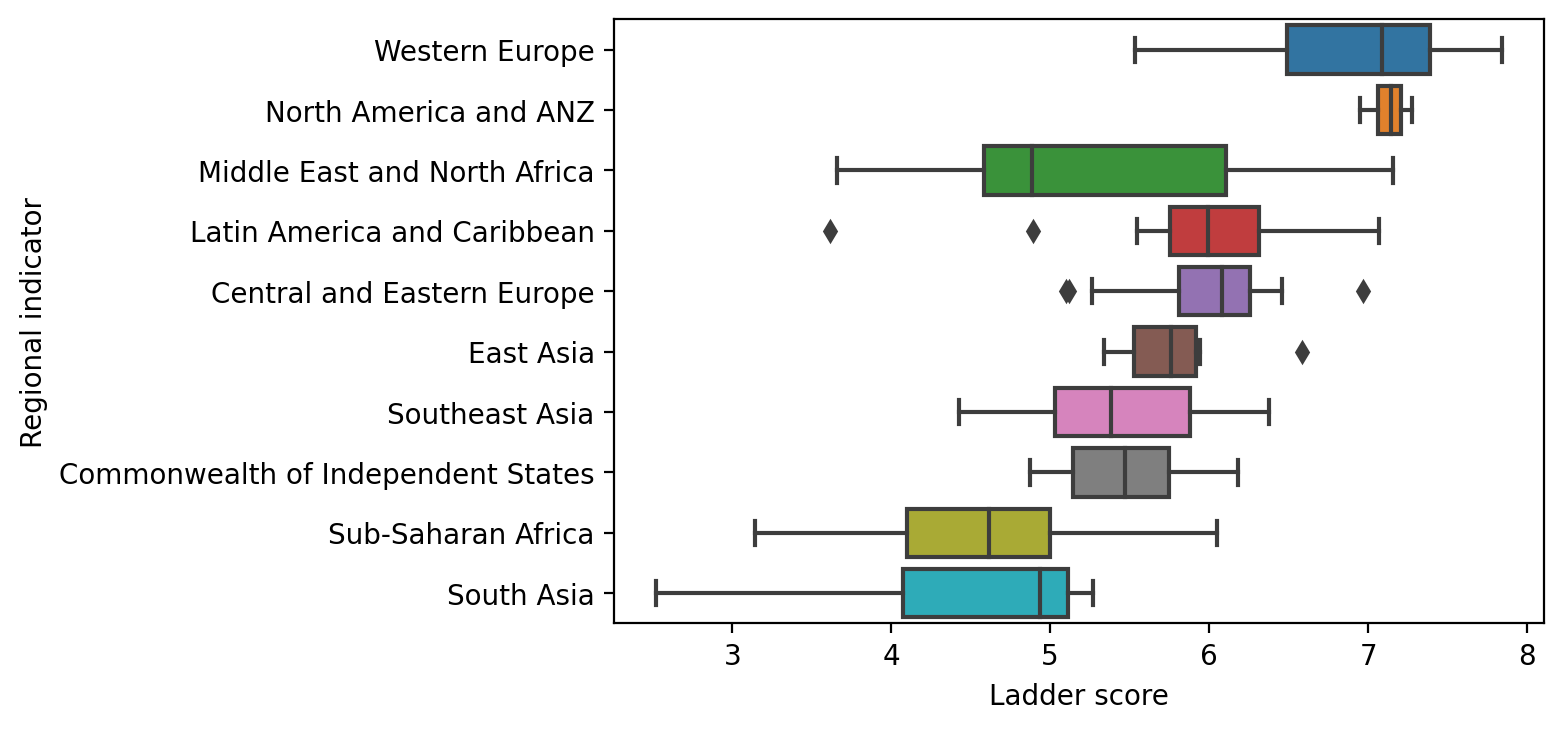

In [29]:
plt.figure(figsize=(6,4), dpi=200)
sns.boxplot(x="Ladder score", y="Regional indicator", data=df1_2021);

In [35]:
center_east_europe=df1_2021[df1_2021["Regional indicator"]=="Central and Eastern Europe"]

In [37]:
center_east_europe["Ladder score"].describe()

count    17.000000
mean      5.984765
std       0.493325
min       5.101000
25%       5.813000
50%       6.078000
75%       6.255000
max       6.965000
Name: Ladder score, dtype: float64

In [39]:
stats.skew(center_east_europe["Ladder score"])

-0.32125033914133405

In [42]:
stats.kurtosis(center_east_europe["Ladder score"])

-0.20615976735179675

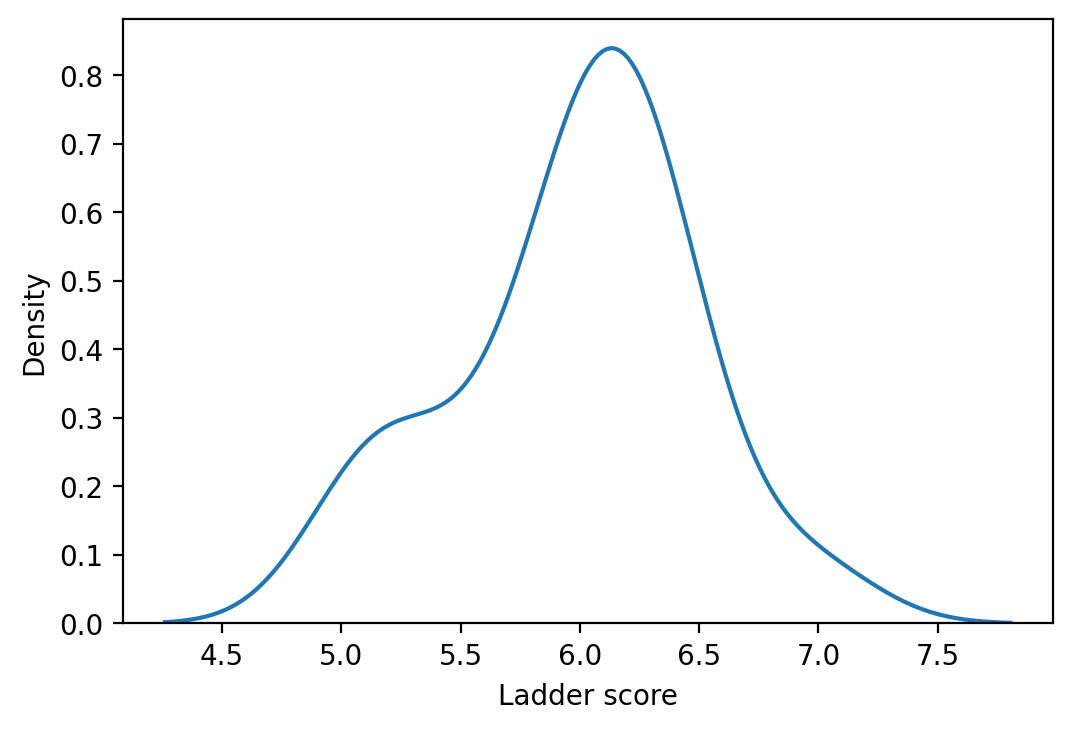

In [44]:
plt.figure(figsize=(6,4), dpi=200)
sns.kdeplot(x="Ladder score", data=center_east_europe);

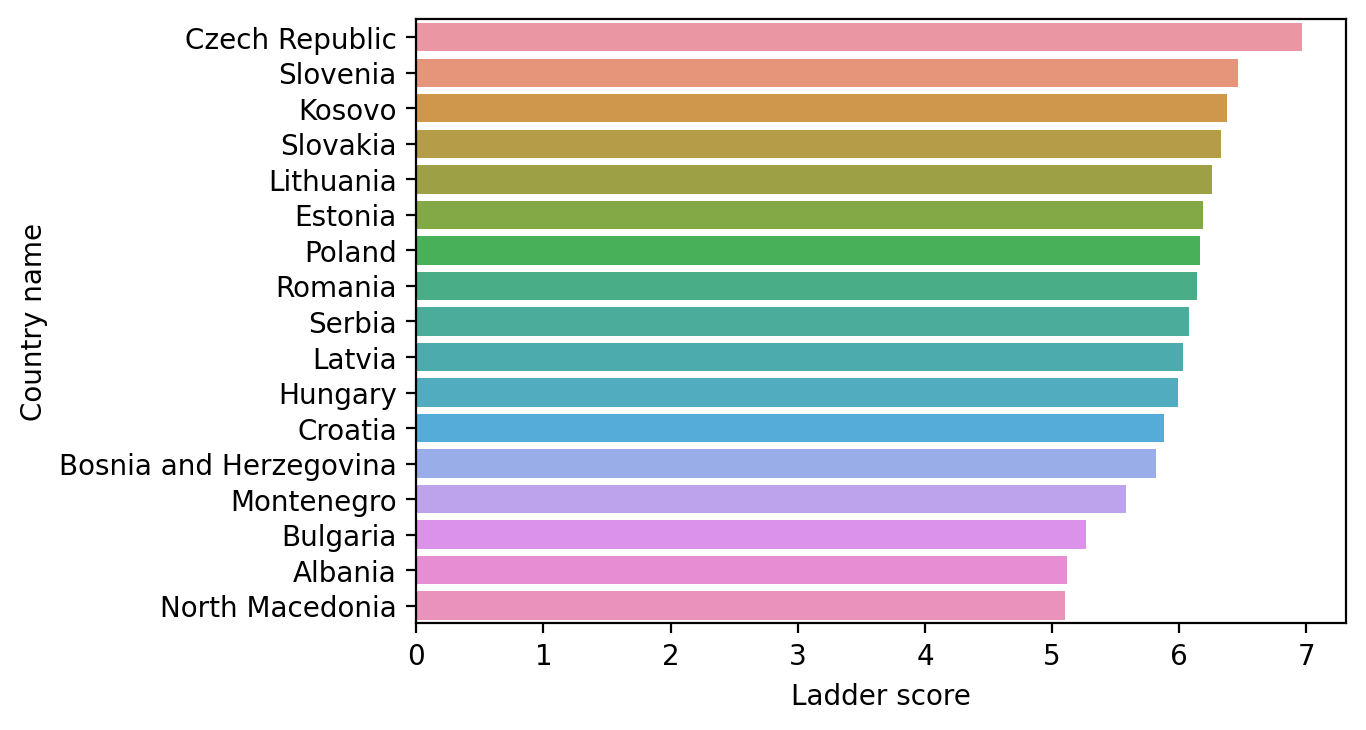

In [48]:
plt.figure(figsize=(6,4), dpi=200)
sns.barplot(y="Country name",x="Ladder score", data=center_east_europe);

In [49]:
grp=center_east_europe.groupby("Country name")["Ladder score"].mean().sort_values(ascending=False).reset_index()

In [52]:
grp.columns

Index(['Country name', 'Ladder score'], dtype='object')

In [59]:
plt.figure(figsize=(12,6),dpi=100)
ladder= sns.barplot(y="Country name",x="Ladder score",data=grp);
    for index, value in enumerate(grp["Ladder score"]);
        plt.text(value,index, str(value))

IndentationError: unexpected indent (<ipython-input-59-2112f0d1a438>, line 3)

In [60]:
df1_2021.corr()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
Logged GDP per capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
Social support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
Healthy life expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
Freedom to make life choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
Generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
Perceptions of corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


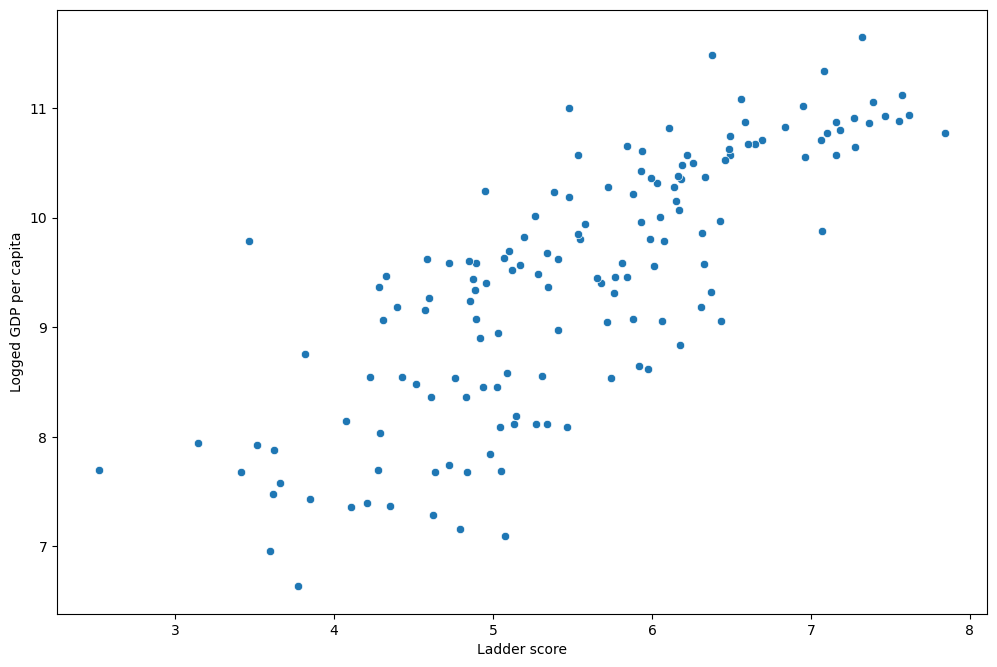

In [63]:
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(y="Logged GDP per capita",x="Ladder score",data=df1_2021);

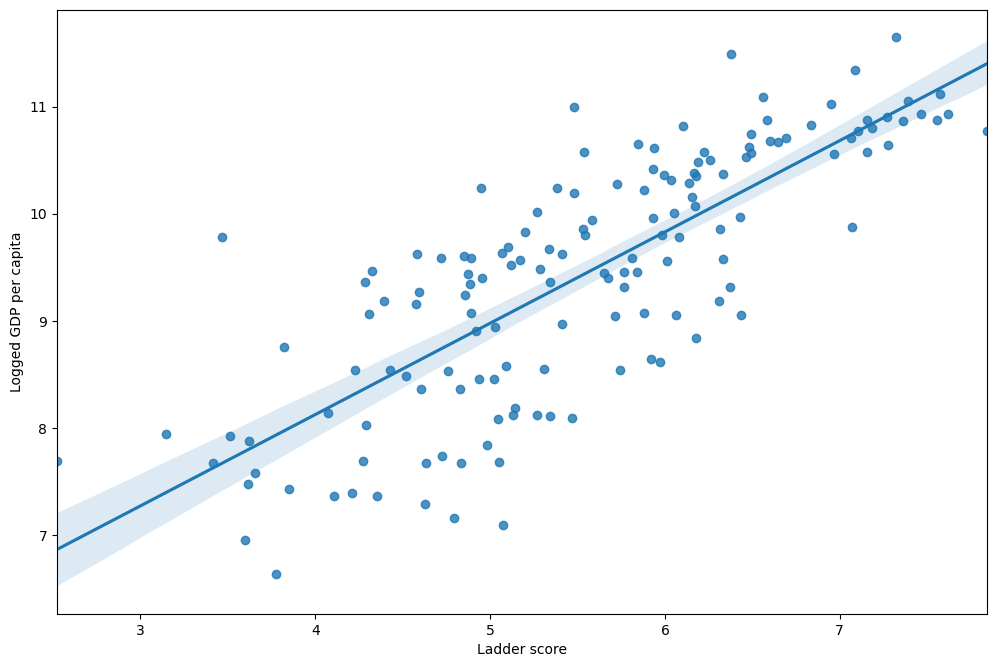

In [64]:
plt.figure(figsize=(12,8),dpi=100)
sns.regplot(y="Logged GDP per capita",x="Ladder score",data=df1_2021);

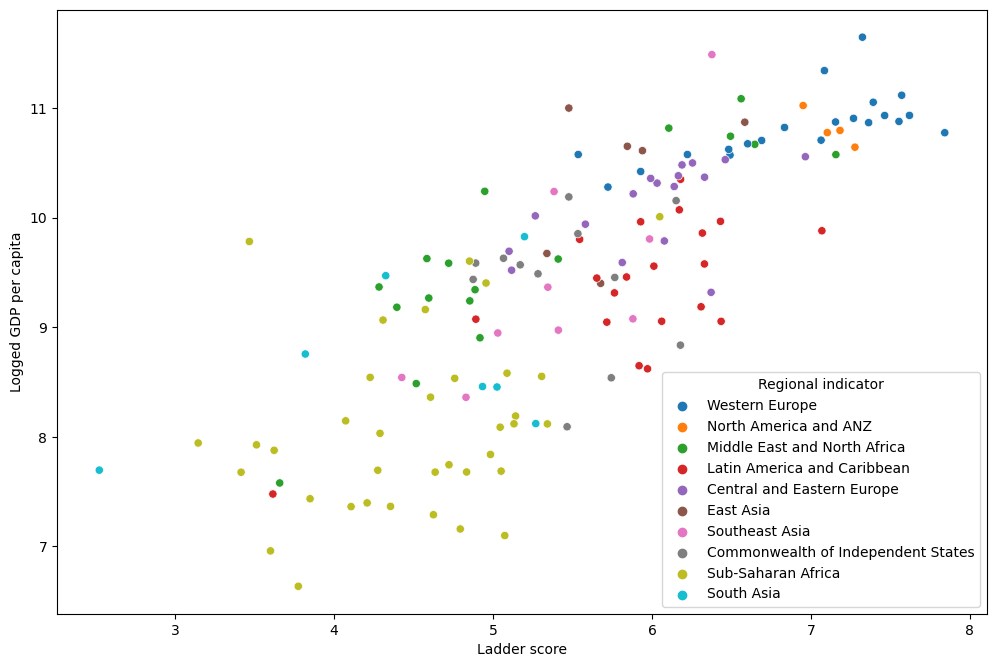

In [66]:
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(y="Logged GDP per capita",x="Ladder score",hue="Regional indicator",data=df1_2021);

In [67]:
df1_2021.cov()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.153312,0.982658,0.093386,5.577875,0.073969,-0.002880,-0.081059
Logged GDP per capita,0.982658,1.342357,0.104532,6.733455,0.056767,-0.034786,-0.071087
Social support,0.093386,0.104532,0.013199,0.561887,0.006288,-0.001990,-0.004184
Healthy life expectancy,5.577875,6.733455,0.561887,45.725227,0.353668,-0.164783,-0.441597
Freedom to make life choices,0.073969,0.056767,0.006288,0.353668,0.012844,0.002893,-0.008153
Generosity,-0.002880,-0.034786,-0.001990,-0.164783,0.002893,0.022697,-0.004427
Perceptions of corruption,-0.081059,-0.071087,-0.004184,-0.441597,-0.008153,-0.004427,0.032122


In [71]:
np.cov(df1_2021["Ladder score"],df1_2021["Logged GDP per capita"])

array([[1.15331183, 0.98265803],
       [0.98265803, 1.34235731]])

In [72]:
np.cov(df1_2021["Ladder score"], df1_2021["Logged GDP per capita"]) 

array([[1.15331183, 0.98265803],
       [0.98265803, 1.34235731]])